In [7]:
# import numpy as np
# import matplotlib.pylab as plt

# 벡터/행렬의 덧셈과 뺄셈

In [8]:
# 벡터의 덧셈과 뺄셈

x = np.array([10, 11, 12, 13, 14])
y = np.array([0, 1, 2, 3, 4])

print(f"x + y: {x + y} \nx - y: {x - y}")

x + y: [10 12 14 16 18] 
x - y: [10 10 10 10 10]


In [10]:
# 행렬의 덧셈과 뺄셈

np.array([[5, 6], [7, 8]]) + np.array([[10, 20], [30, 40]]) - np.array([[1, 2], [3, 4]])

array([[14, 24],
       [34, 44]])

In [12]:
# 브로드캐스팅(Broadcasting): 스칼라 값을 벡터나 행렬과의 연산에 쓰이게 할 수 있는 기능

np.array([10, 11, 12]) - 10 
# = np.array([10, 11, 12]) - np.array([10, 10, 10])

array([0, 1, 2])

In [14]:
# 벡터 내적: 벡터의 곱

# 두 벡터의 차원(길이)이 같아야 하고
# 앞의 벡터가 행 벡터이고 뒤의 벡터가 열 벡터여야 함

x = np.array([[1], [2], [3]])
y = np.array([[4], [5], [6]])

x.T @ y  # 또는 np.dot(x.T, y)
# 1*4 + 2*5 + 3*6 = 32

# numpy에서는 1차원 배열끼리도 내적 가능
# 가중합(Weighted Sum)을 구할 때

array([[32]])

In [16]:
# 연습 문제 2.2.1

# A, B, C 세 회사의 주식은 각각 100만원, 80만원, 50만원이다. 이 주식을 각각 3주, 4주, 5주를 매수할 때 필요한 금액을 구하고자 한다.

p = np.array([100, 80, 50])
n = np.array([3, 4, 5])

p @ n

870

In [17]:
# 가중평균(weighted average): 가중합의 가중치값을 전체 가중치값의 합으로 나눈 값

x = np.arange(10)
# array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x.mean()

4.5

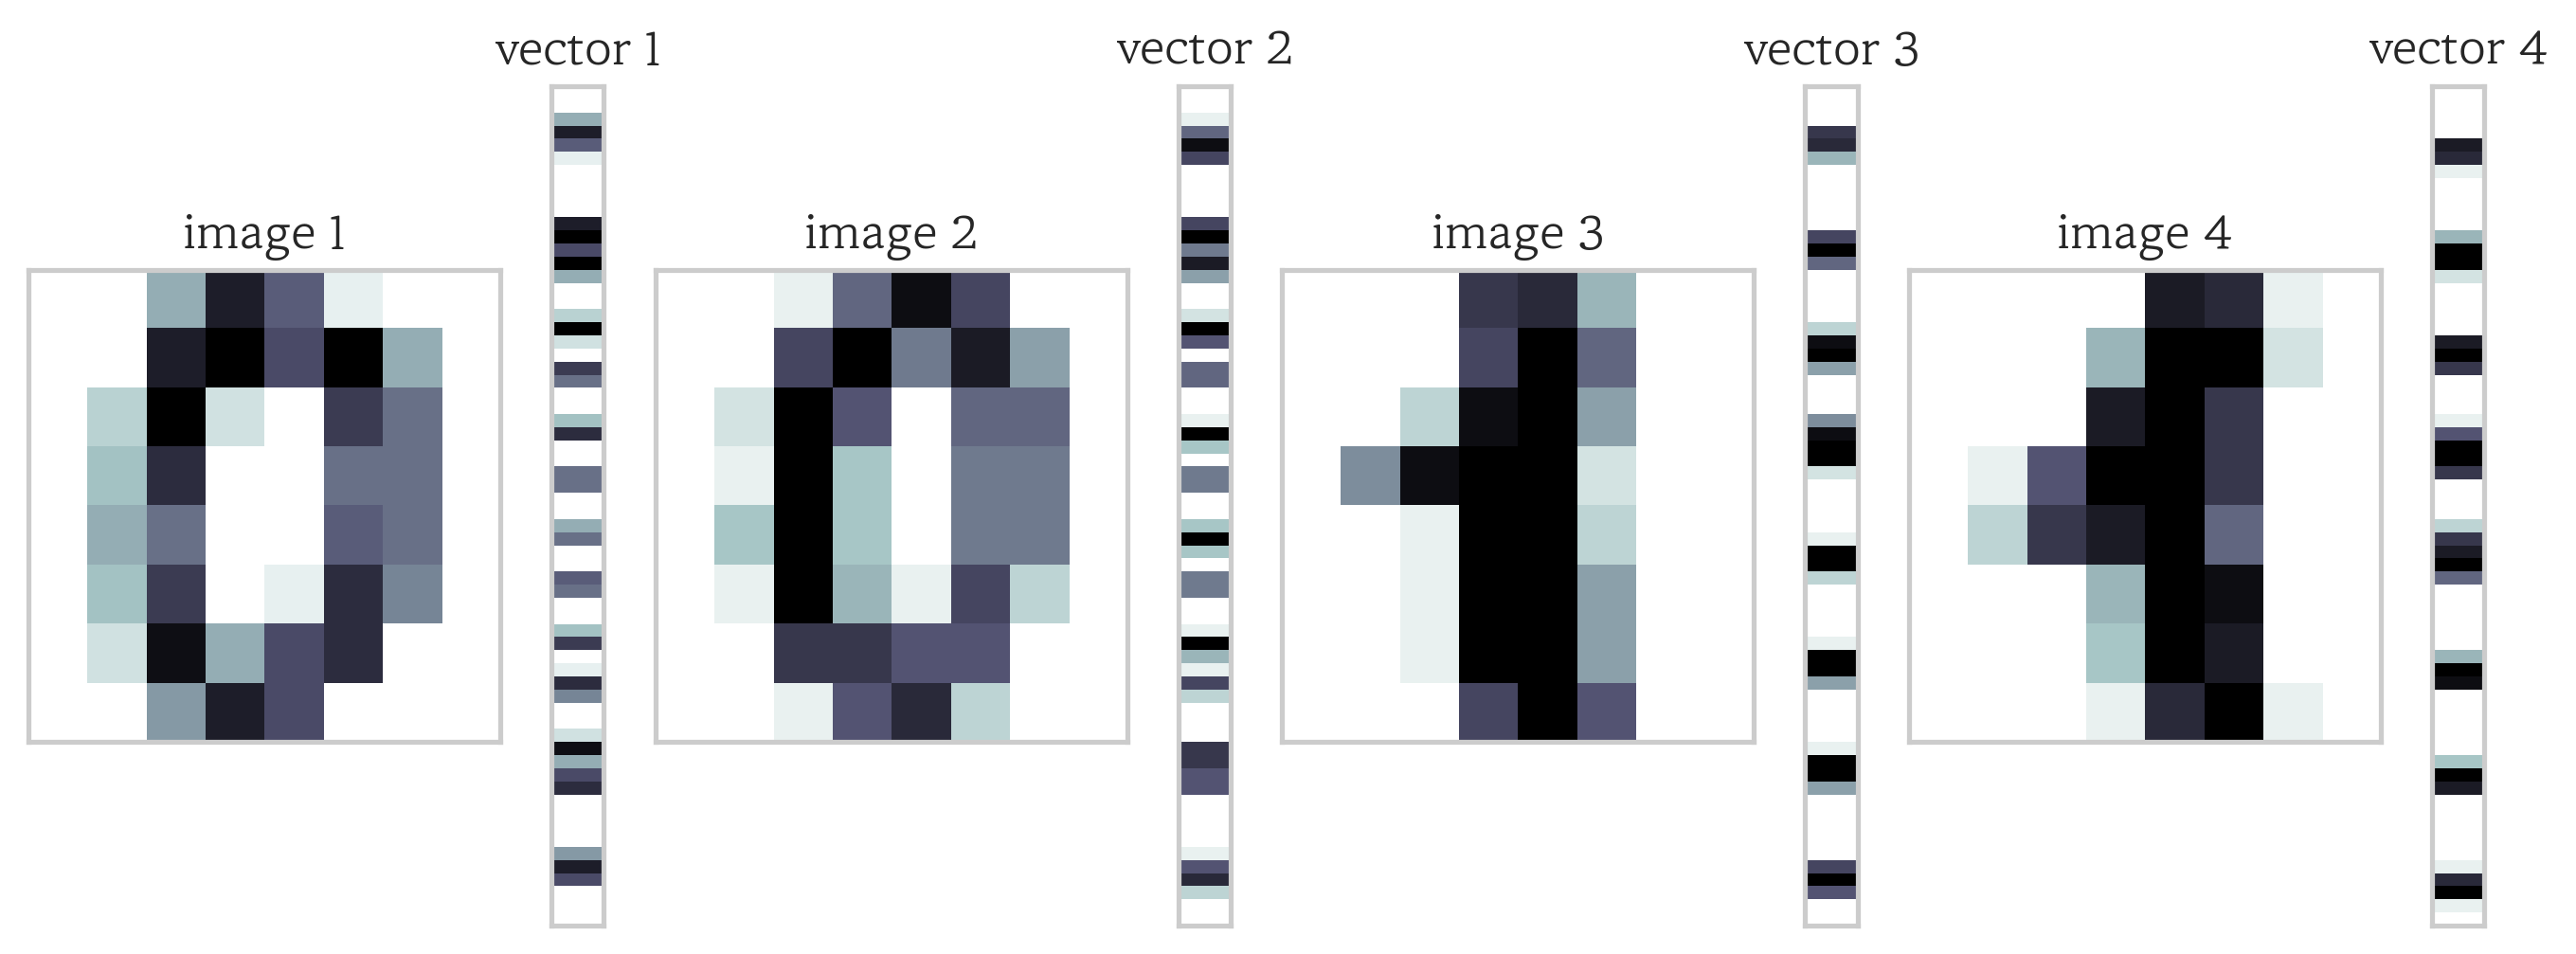

In [18]:
# 유사도(similarity): 두 벡터가 닮은 정도를 정량적으로 나타낸 값

# 0과 1을 나타내는 MNIST 이미지에 대한 내적 구하기

from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits()
d1 = digits.images[0]
d2 = digits.images[10]
d3 = digits.images[1]
d4 = digits.images[11]
v1 = d1.reshape(64, 1)
v2 = d2.reshape(64, 1)
v3 = d3.reshape(64, 1)
v4 = d4.reshape(64, 1)

plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(1, 8, height_ratios=[1],
                       width_ratios=[9, 1, 9, 1, 9, 1, 9, 1])
for i in range(4):
    plt.subplot(gs[2 * i])
    plt.imshow(eval("d" + str(i + 1)), aspect=1,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("image {}".format(i + 1))
    plt.subplot(gs[2 * i + 1])
    plt.imshow(eval("v" + str(i + 1)), aspect=0.25,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("vector {}".format(i + 1))
plt.tight_layout()
plt.show()

In [19]:
# "0" 이미지와 "0" 이미지, 또는 "1" 이미지와 "1" 이미지의 내적값

(v1.T @ v2)[0][0], (v3.T @ v4)[0][0]

(3064.0, 3661.0)

In [20]:
# "0" 이미지와 "1" 이미지, 또는 "1" 이미지와 "0" 이미지의 내적값

(v1.T @ v3)[0][0], (v1.T @ v4)[0][0], (v2.T @ v3)[0][0], (v2.T @ v4)[0][0]

# 상대적으로 작은 값 (작은 코사인 유사도(cosine similarity))

(1866.0, 1883.0, 2421.0, 2479.0)

In [38]:
# 연습 문제 2.2.3

from sklearn.datasets import load_digits
X = load_digits().data # 숫자 이미지 전체 데이터를 모두 벡터로 변환

# (1) 내적을 이용하여 첫 번째 이미지와 10번째 이미지의 유사도를 구하라.
print(X[0].T @ X[9])

# (2) 내적을 이용하여 모든 이미지의 조합에 대해 유사도를 구하라. 어떻게 구현하는 것이 효율적일까?
print((X.T @ X))

2807.0
[[0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [0.00000e+00 1.64400e+03 7.15400e+03 ... 3.40600e+03 1.30600e+03
  6.60000e+01]
 [0.00000e+00 7.15400e+03 8.92850e+04 ... 6.11890e+04 2.18770e+04
  4.72000e+03]
 ...
 [0.00000e+00 3.40600e+03 6.11890e+04 ... 1.44749e+05 5.32400e+04
  9.59500e+03]
 [0.00000e+00 1.30600e+03 2.18770e+04 ... 5.32400e+04 3.77360e+04
  9.83300e+03]
 [0.00000e+00 6.60000e+01 4.72000e+03 ... 9.59500e+03 9.83300e+03
  6.45300e+03]]
